In [22]:
#DataFrame对象的rolling方法允许我们将数据置于窗口中，然后就可以使用函数对窗口中的数据进行运算和处理。例如，我们获取了某只股票近期的数据，想制作5日均线和10日均线，那么就需要先设置窗口再进行运算。我们可以使用三方库pandas-datareader来获取指定的股票在某个时间段内的数据，具体的操作如下所示。
#通过pandas-datareader 提供的get_data_stooq从 Stooq 网站获取百度（股票代码：BIDU）近期股票数据。
import pandas_datareader as pdr
from sympy.printing.pretty.pretty_symbology import line_width

nvda_df = pdr.get_data_stooq('NVDA', start='2025-02-15', end = '2025-03-01')
nvda_df.sort_index(inplace=True)
nvda_df

,Open,High,Low,Close,Volume
Date,,,,,
2025-02-18,141.270,143.44,137.9250,139.40,219176627
2025-02-19,139.510,141.36,137.2200,139.23,167536006
2025-02-20,140.030,140.66,136.7901,140.11,143903583
2025-02-21,140.040,141.46,134.0300,134.43,228217585
2025-02-24,136.560,138.59,130.0800,130.28,251381137
2025-02-25,129.980,130.20,124.4400,126.63,271428711
2025-02-26,129.985,133.73,128.4900,131.28,322553814
2025-02-27,135.000,135.01,120.0100,120.15,443175846
2025-02-28,118.020,125.09,116.4000,124.92,389091145


In [23]:
#上面的DataFrame有Open、High、Low、Close、Volume五个列，分别代码股票的开盘价、最高价、最低价、收盘价和成交量，接下来我们对百度的股票数据进行窗口计算。
nvda_df.rolling(5).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2025-02-18,NaN,NaN,NaN,NaN,NaN
2025-02-19,NaN,NaN,NaN,NaN,NaN
2025-02-20,NaN,NaN,NaN,NaN,NaN
2025-02-21,NaN,NaN,NaN,NaN,NaN
2025-02-24,139.482,141.102,135.20902,136.690,202042987.6
2025-02-25,137.224,138.454,132.51202,134.136,212493404.4
2025-02-26,135.319,136.928,130.76602,132.546,243496966.0
2025-02-27,134.313,135.798,127.41000,128.554,303351418.6
2025-02-28,129.909,132.524,123.88400,126.652,335526130.6


In [32]:
#上面的Close 列的数据就是我们需要的5日均线，当然，我们也可以用下面的方法，直接在Close列对应的Series对象上计算5日均线
nvda_df.Close.rolling(5).mean()

Date
2025-02-18        NaN
2025-02-19        NaN
2025-02-20        NaN
2025-02-21        NaN
2025-02-24    136.690
2025-02-25    134.136
2025-02-26    132.546
2025-02-27    128.554
2025-02-28    126.652
Name: Close, dtype: float64

In [2]:
#我们用 ρ 值判断指标的相关性时遵循以下两个步骤。
#协方差的数值大小取决于变量的大小，通常是不容易解释的，但是正态形式的协方差大小可以显示两变量线性关系的强弱。在统计学中，皮尔逊积矩相关系数就是正态形式的协方差，它用于度量两个变量 X和 Y 之间的相关程度（线性相关），其值介于-1到1之间。
#判断指标间是正相关、负相关，还是不相关。
#当 ρ>0，认为变量之间是正相关，也就是两者的趋势一致。
#当 ρ<0，认为变量之间是负相关，也就是两者的趋势相反。
#当 ρ=0，认为变量之间是不相关的，但并不代表两个指标是统计独立的。
#判断指标间的相关程度。
#当 ρ 的绝对值在 $ [0.6,1] $ 之间，认为变量之间是强相关的。
#当 ρ 的绝对值在 $ [0.1,0.6) $ 之间，认为变量之间是弱相关的。
#当 ρ 的绝对值在 $ [0,0.1) $ 之间，认为变量之间没有相关性。
#DataFrame对象的cov方法和corr方法分别用于计算协方差和相关系数，corr方法的第一个参数method的默认值是pearson，表示计算皮尔逊相关系数；除此之外，还可以指定kendall或spearman来获得肯德尔系数或斯皮尔曼等级相关系数。
import pandas as pd
boston_df = pd.read_csv(r'D:\study\coding\Github Repos\Python-learning\numpandas\data_warehouse\housing.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.cov()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716


In [4]:
#DataFrame对象的cov方法和corr方法分别用于计算协方差和相关系数，corr方法的第一个参数method的默认值是pearson，表示计算皮尔逊相关系数；除此之外，还可以指定kendall或spearman来获得肯德尔系数或斯皮尔曼等级相关系数。
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
#斯皮尔曼相关系数对数据条件的要求没有皮尔逊相关系数严格，只要两个变量的观测值是成对的等级评定资料，或者是由连续变量观测资料转化得到的等级资料，不论两个变量的总体分布形态、样本容量的大小如何，都可以用斯皮尔曼等级相关系数来进行研究。我们通过下面的方式来计算斯皮尔曼相关系数。
boston_df.corr(method='spearman')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
ZN,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
INDUS,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
CHAS,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
NOX,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
RM,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
AGE,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
DIS,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
RAD,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
TAX,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


In [10]:
boston_df.corr(method='pearson').style.background_gradient('RdYlBu', subset=['CRIM'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


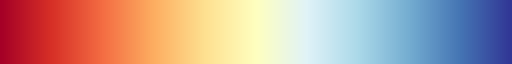

In [12]:
#上面代码中的RdYlBu代表的颜色如下所示，相关系数的数据值越接近-1，颜色越接近红色；数据值越接近1，颜色越接近蓝色；数据值在0附件则是黄色。
import matplotlib.pyplot as plt
plt.get_cmap('RdYlBu')

In [24]:
#Index的应用
#我们再来看看Index类型，它为Series和DataFrame对象提供了索引服务，常用的Index有以下几种。
#范围索引（RangeIndex）
import numpy as np
sales_data = np.random.randint(400, 1000, 12)
month_index = pd.RangeIndex(1, 13, name='月份')
ser = pd.Series(data=sales_data, index=month_index, name='销售额')
ser

月份
1     951
2     519
3     522
4     994
5     658
6     876
7     899
8     593
9     599
10    428
11    647
12    858
Name: 销售额, dtype: int32

In [27]:
#分类索引（CategoricalIndex）
import pandas as pd
import numpy as np
amount = np.array([6,6,7,6,8,6])
cate_index = pd.CategoricalIndex(
    ['苹果', '香蕉', '苹果', '苹果', '桃子', '香蕉'],
    ordered=True,
    categories=['苹果', '香蕉', '桃子'])
ser = pd.Series(data = amount, index=cate_index)
ser

苹果    6
香蕉    6
苹果    7
苹果    6
桃子    8
香蕉    6
dtype: int32

In [30]:
ser.groupby(ser>6).sum()

False    24
True     15
dtype: int32

In [34]:
ser.groupby(level=0).sum()

C:\Users\10032\AppData\Local\Temp\ipykernel_3792\3246160355.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ser.groupby(level=0).sum()


苹果    19
香蕉    12
桃子     8
dtype: int32

In [35]:
#多级索引（MultiIndex）
ids = np.arange(1001, 1006)
sms = ['期中', '期末']
index = pd.MultiIndex.from_product((ids, sms), names=['学号', '学期'])
courses = ['语文', '数学', '英语']
scores = np.random.randint(60, 101, (10, 3))
df = pd.DataFrame(data=scores, columns=courses, index=index)
df

语文  数学  英语
学号   学期             
1001 期中   72  91  85
     期末  100  68  66
1002 期中   66  85  76
     期末   67  60  72
1003 期中   78  70  70
     期末   74  62  93
1004 期中   69  81  61
     期末   91  78  65
1005 期中   62  73  92
     期末   90  95  64

In [42]:
# 计算每个学生的成绩，期中占25%，期末占75%
df.groupby(level=0).agg(lambda x : x.values[0]*0.25 +x.values[1]*0.75)

,语文,数学,英语
学号,,,
1001,93.00,73.75,70.75
1002,66.75,66.25,73.00
1003,75.00,64.00,87.25
1004,85.50,78.75,64.00
1005,83.00,89.50,71.00


In [49]:
#日期时间索引（DatetimeIndex）
#通过date_range()函数，我们可以创建日期时间索引，代码如下所示。
pd.date_range('2013-1-1','2013-6-1', periods=10)

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-17 18:40:00',
               '2013-02-03 13:20:00', '2013-02-20 08:00:00',
               '2013-03-09 02:40:00', '2013-03-25 21:20:00',
               '2013-04-11 16:00:00', '2013-04-28 10:40:00',
               '2013-05-15 05:20:00', '2013-06-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [57]:
pd.date_range('2025-1-1','2025-6-2', freq='W')#以一周为周期，每周的星期一， 默认是星期天

DatetimeIndex(['2025-01-05', '2025-01-12', '2025-01-19', '2025-01-26',
               '2025-02-02', '2025-02-09', '2025-02-16', '2025-02-23',
               '2025-03-02', '2025-03-09', '2025-03-16', '2025-03-23',
               '2025-03-30', '2025-04-06', '2025-04-13', '2025-04-20',
               '2025-04-27', '2025-05-04', '2025-05-11', '2025-05-18',
               '2025-05-25', '2025-06-01'],
              dtype='datetime64[ns]', freq='W-SUN')

In [58]:
#通过DateOffset类型，我们可以设置时间差并和DatetimeIndex进行运算，具体的操作如下所示。
index = pd.date_range('2025-1-1', '2025-6-2', freq='W')
index - pd.DateOffset(days=2)#减两天


DatetimeIndex(['2025-01-03', '2025-01-10', '2025-01-17', '2025-01-24',
               '2025-01-31', '2025-02-07', '2025-02-14', '2025-02-21',
               '2025-02-28', '2025-03-07', '2025-03-14', '2025-03-21',
               '2025-03-28', '2025-04-04', '2025-04-11', '2025-04-18',
               '2025-04-25', '2025-05-02', '2025-05-09', '2025-05-16',
               '2025-05-23', '2025-05-30'],
              dtype='datetime64[ns]', freq=None)

In [59]:
index + pd.DateOffset(days=2)#加两天

DatetimeIndex(['2025-01-07', '2025-01-14', '2025-01-21', '2025-01-28',
               '2025-02-04', '2025-02-11', '2025-02-18', '2025-02-25',
               '2025-03-04', '2025-03-11', '2025-03-18', '2025-03-25',
               '2025-04-01', '2025-04-08', '2025-04-15', '2025-04-22',
               '2025-04-29', '2025-05-06', '2025-05-13', '2025-05-20',
               '2025-05-27', '2025-06-03'],
              dtype='datetime64[ns]', freq=None)

In [104]:
#可以使用DatatimeIndex类型的相关方法来处理数据，具体包括：
#shift()方法：通过时间前移或后移数据，我们仍然以上面百度股票数据为例，代码如下所示。

#代码：
import pandas_datareader as pdr
nvda_df = pdr.get_data_stooq('NVDA', start='2025-02-15', end = '2025-03-01')
nvda_df.sort_index(inplace=True)
nvda_df

,Open,High,Low,Close,Volume
Date,,,,,
2025-02-18,141.270,143.44,137.925,139.40,219176627
2025-02-19,139.510,141.36,137.220,139.23,167536006
2025-02-20,140.030,140.66,136.790,140.11,143903583
2025-02-21,140.040,141.46,134.030,134.43,228217585
2025-02-24,136.560,138.59,130.080,130.28,251381137
2025-02-25,129.980,130.20,124.440,126.63,271428711
2025-02-26,129.985,133.73,128.490,131.28,322553814
2025-02-27,135.000,135.01,120.010,120.15,443175846
2025-02-28,118.020,125.09,116.400,124.92,389091145


In [65]:
nvda_df.shift(3,fill_value=0)

,Open,High,Low,Close,Volume
Date,,,,,
2025-02-18,0.00,0.00,0.000,0.00,0
2025-02-19,0.00,0.00,0.000,0.00,0
2025-02-20,0.00,0.00,0.000,0.00,0
2025-02-21,141.27,143.44,137.925,139.40,219176627
2025-02-24,139.51,141.36,137.220,139.23,167536006
2025-02-25,140.03,140.66,136.790,140.11,143903583
2025-02-26,140.04,141.46,134.030,134.43,228217585
2025-02-27,136.56,138.59,130.080,130.28,251381137
2025-02-28,129.98,130.20,124.440,126.63,271428711


In [66]:
nvda_df.shift(-1,fill_value=0)

,Open,High,Low,Close,Volume
Date,,,,,
2025-02-18,139.510,141.36,137.22,139.23,167536006
2025-02-19,140.030,140.66,136.79,140.11,143903583
2025-02-20,140.040,141.46,134.03,134.43,228217585
2025-02-21,136.560,138.59,130.08,130.28,251381137
2025-02-24,129.980,130.20,124.44,126.63,271428711
2025-02-25,129.985,133.73,128.49,131.28,322553814
2025-02-26,135.000,135.01,120.01,120.15,443175846
2025-02-27,118.020,125.09,116.40,124.92,389091145
2025-02-28,0.000,0.00,0.00,0.00,0


In [68]:
#asfreq()方法：指定一个时间频率抽取对应的数据，代码如下所示。
nvda_df.asfreq('5d')

,Open,High,Low,Close,Volume
Date,,,,,
2025-02-18,141.27,143.44,137.925,139.40,219176627.0
2025-02-23,NaN,NaN,NaN,NaN,NaN
2025-02-28,118.02,125.09,116.400,124.92,389091145.0


In [69]:
nvda_df.asfreq('5D', method='ffill')

,Open,High,Low,Close,Volume
Date,,,,,
2025-02-18,141.27,143.44,137.925,139.40,219176627
2025-02-23,140.04,141.46,134.030,134.43,228217585
2025-02-28,118.02,125.09,116.400,124.92,389091145


In [111]:
#resample()方法：基于时间对数据进行重采样，相当于根据时间周期对数据进行了分组操作，代码如下所示。
nvda_df.resample('3D').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2025-02-18,140.270,141.820000,137.311667,139.580000,1.768721e+08
2025-02-21,140.040,141.460000,134.030000,134.430000,2.282176e+08
2025-02-24,132.175,134.173333,127.670000,129.396667,2.817879e+08
2025-02-27,126.510,130.050000,118.205000,122.535000,4.161335e+08


In [75]:
#时区转换
#获取时区信息。
import pytz

pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [79]:
#tz_localize()方法：将日期时间本地化。
nvda_df = nvda_df.tz_localize('Asia/Shanghai')
nvda_df

TypeError: Already tz-aware, use tz_convert to convert.

In [86]:
#tz_convert()方法：转换时区。
nvda_df = nvda_df.tz_convert('America/New_York')
nvda_df

,Open,High,Low,Close,Volume
Date,,,,,
2025-02-17 11:00:00-05:00,141.270,143.44,137.925,139.40,219176627
2025-02-18 11:00:00-05:00,139.510,141.36,137.220,139.23,167536006
2025-02-19 11:00:00-05:00,140.030,140.66,136.790,140.11,143903583
2025-02-20 11:00:00-05:00,140.040,141.46,134.030,134.43,228217585
2025-02-23 11:00:00-05:00,136.560,138.59,130.080,130.28,251381137
2025-02-24 11:00:00-05:00,129.980,130.20,124.440,126.63,271428711
2025-02-25 11:00:00-05:00,129.985,133.73,128.490,131.28,322553814
2025-02-26 11:00:00-05:00,135.000,135.01,120.010,120.15,443175846
2025-02-27 11:00:00-05:00,118.020,125.09,116.400,124.92,389091145


In [4]:
#数据可视化-1
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC']
plt.rcParams['axes.unicode_minus'] = False
#这行代码是 IPython 或 Jupyter Notebook 中的一个魔法命令（magic command）
#作用是设置 Matplotlib 图形的显示格式为 SVG（可缩放矢量图形）。SVG 格式的图形具有清晰、高质量的特点，即使在放大或缩小后也能保持清晰度。
%config InlineBackend.figure_format='svg'

In [8]:
plt.figure(figsize=(8,4), dpi=120, facecolor = 'darkgray')

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

<Axes: >

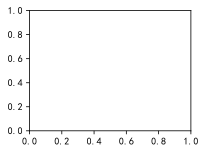

In [9]:
#创建坐标系
#可以直接使用pyplot模块的subplot函数来创建坐标系，该函数会返回Axes对象。
#subplot的前三个参数分别用来指定整个画布分成几行几列以及当前坐标系的索引，这三个参数的默认值都是1。
#可以直接使用pyplot模块的subplot函数来创建坐标系，该函数会返回Axes对象。subplot的前三个参数分别用来指定整个画布分成几行几列以及当前坐标系的索引，这三个参数的默认值都是1。如果需要在画布上创建多个坐标系，就需要使用该函数，否则就直接使用默认的也是唯一的坐标系。当然，也可以通过上面创建的Figure对象的add_subplot方法或add_axes方法来创建坐标系，前者跟subplot函数的作用一致，后者会产生嵌套的坐标系。
plt.subplot(2,2,1)

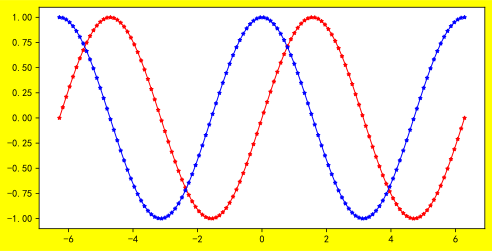

In [37]:
#在一个坐标系上同时绘制正弦和余弦曲线
import numpy as np
x = np.linspace(-2*np.pi, 2*np.pi, 120)
y1 = np.sin(x)
y2 = np.cos(x)

#创建画布
plt.figure(figsize=(8,4), dpi=120, facecolor = 'yellow')
#绘制折线图
plt.plot(x,y1, linewidth=1, marker='*', markersize=4,color='red')#sinx
plt.plot(x,y2, linewidth=1, marker='*', markersize=4,color='blue')#cosx
#显示绘图
plt.show()



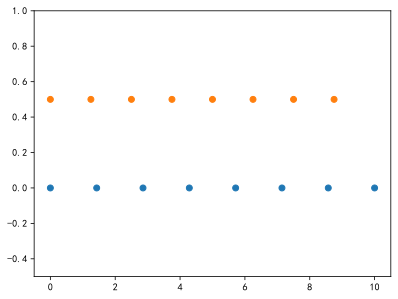

In [19]:
import matplotlib.pyplot as plt
import numpy as np
N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)#The endpoint of the interval can optionally be excluded
plt.plot(x1, y, 'o')
plt.plot(x2, y + 0.5, 'o')
plt.ylim([-0.5, 1])
plt.show()

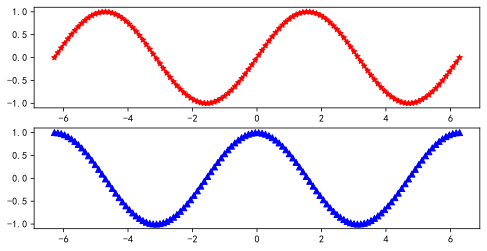

In [38]:
#如果要使用两个坐标系分别绘制正弦和余弦，可以用上面提到的subplot函数来创建坐标系，然后再绘图。
plt.figure(figsize=(8, 4), dpi=120)
# 创建坐标系（第1个图）
plt.subplot(2, 1, 1)
plt.plot(x, y1, linewidth=2, marker='*', color='red')
# 创建坐标系（第2个图）
plt.subplot(2, 1, 2)
plt.plot(x, y2, linewidth=2, marker='^', color='blue')
plt.show()


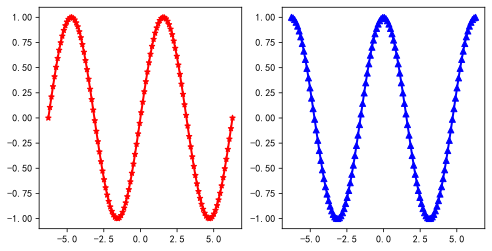

In [39]:
plt.figure(figsize=(8, 4), dpi=120)
plt.subplot(1, 2, 1)
plt.plot(x, y1, linewidth=2, marker='*', color='red')
plt.subplot(1, 2, 2)
plt.plot(x, y2, linewidth=2, marker='^', color='blue')
plt.show()

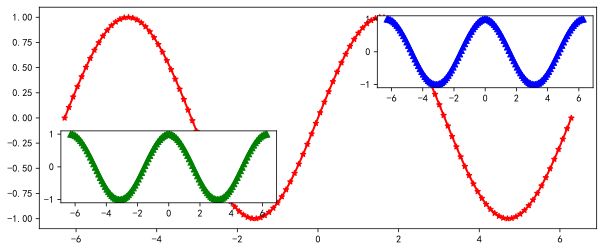

In [42]:
fig = plt.figure(figsize=(10, 4), dpi=120)
plt.plot(x, y1, linewidth=2, marker='*', color='red')
# 用Figure对象的add_axes方法在现有坐标系中嵌套一个新的坐标系
# 该方法的参数是一个四元组，代表了新坐标系在原坐标系中的位置
# 前两个值是左下角的位置，后两个值是坐标系的宽度和高度
ax = fig.add_axes((0.595, 0.6, 0.3,0.25))
ax.plot(x, y2, marker='^', color='blue')
ax = fig.add_axes((0.155, 0.2, 0.3,0.25))
ax.plot(x, y2, marker='^', color='green')
plt.show()

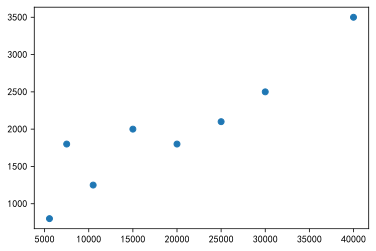

In [43]:
#散点图
#散点图可以帮助我们了解两个变量的关系，如果需要了解三个变量的关系，可以将散点图升级为气泡图。下面的代码中，x和y两个数组分别表示每个月的收入和每个月网购的支出，如果我们想了解x和y是否存在相关关系，就可以绘制如下所示的散点图。
x = np.array([5550,7500,10500,15000,20000,25000,30000,40000])
y = np.array([800,1800,1250,2000,1800,2100,2500,3500])

plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x, y)
plt.show()

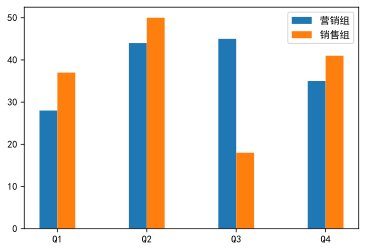

In [49]:
#柱状图柱状图
x=np.arange(4)
y1 = np.random.randint(20,50,4)
y2 = np.random.randint(10,60,4)
plt.figure(figsize=(6,4),dpi=120)
plt.bar(x-0.1, y1, width=0.2, label='营销组')
plt.bar(x+0.1, y2, width=0.2, label='销售组')
plt.xticks(x,labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend()
plt.show()


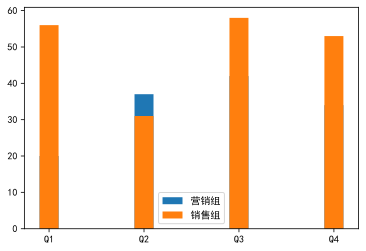

In [52]:
#柱状图柱状图
x=np.arange(4)
y1 = np.random.randint(20,50,4)
y2 = np.random.randint(10,60,4)
plt.figure(figsize=(6,4),dpi=120)
plt.bar(x, y1, width=0.2, label='营销组')
plt.bar(x, y2, width=0.2, label='销售组')
plt.xticks(x,labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend()
plt.show()

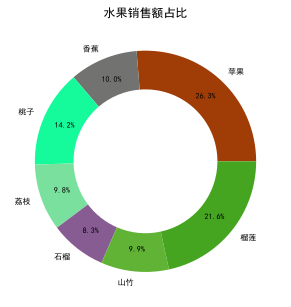

In [64]:
#饼状图
data = np.random.randint(100, 500, 7)
labels = ['苹果', '香蕉', '桃子', '荔枝', '石榴', '山竹', '榴莲']

plt.figure(figsize=(5, 5), dpi=120)
plt.pie(
    data,
    # 自动显示百分比
    autopct='%.1f%%',
    # 饼图的半径
    radius=1,
    # 百分比到圆心的距离
    pctdistance=0.8,
    # 颜色（随机生成）
    colors=np.random.rand(7, 3), #np.random.rand(7, 3)这里的（7,3）是dimensions 因为颜色rgb有3个值
    # 分离距离
    # explode=[0.05, 0, 0.1, 0, 0, 0, 0],
    # 阴影效果
    # shadow=True,
    # 字体属性
    textprops=dict(fontsize=8, color='black'),
    # 楔子属性（生成环状饼图的关键）
    wedgeprops=dict(linewidth=1, width=0.35),
    # 标签
    labels=labels
)
# 定制图表的标题
plt.title('水果销售额占比')
plt.show()

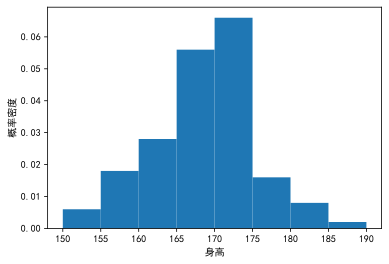

In [65]:
#直方图
#在统计学中，直方图是一种展示数据分布情况的图形，是一种二维统计图表，它的两个坐标分别是统计样本和该样本对应的某个属性的度量。下面的数据是某学校100名男学生的身高，如果我们想知道数据的分布，就可以使用直方图。
heights = np.array([
    170, 163, 174, 164, 159, 168, 165, 171, 171, 167,
    165, 161, 175, 170, 174, 170, 174, 170, 173, 173,
    167, 169, 173, 153, 165, 169, 158, 166, 164, 173,
    162, 171, 173, 171, 165, 152, 163, 170, 171, 163,
    165, 166, 155, 155, 171, 161, 167, 172, 164, 155,
    168, 171, 173, 169, 165, 162, 168, 177, 174, 178,
    161, 180, 155, 155, 166, 175, 159, 169, 165, 174,
    175, 160, 152, 168, 164, 175, 168, 183, 166, 166,
    182, 174, 167, 168, 176, 170, 169, 173, 177, 168,
    172, 159, 173, 185, 161, 170, 170, 184, 171, 172
])
#可以使用pyplot模块的hist函数来绘制直方图，代码如下所示。
# 将身高数据分到以下8个组中
bins = np.array([150, 155, 160, 165, 170, 175, 180, 185, 190])

plt.figure(figsize=(6, 4), dpi=120)
# density参数默认值为False，表示纵轴显示频数
# 将density参数设置为True，纵轴会显示概率密度
plt.hist(heights, bins, density=True)
# 定制横轴标签
plt.xlabel('身高')
# 定制纵轴标签
plt.ylabel('概率密度')
plt.show()

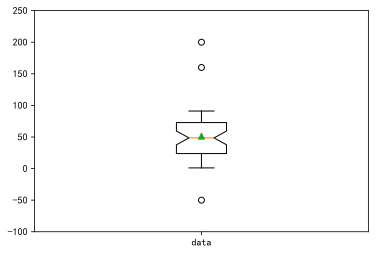

In [68]:
#箱线图
# 数组中有47个[0, 100)范围的随机数
data = np.random.randint(0, 100, 47)
# 向数组中添加三个可能是离群点的数据
data = np.append(data, 160)
data = np.append(data, 200)
data = np.append(data, -50)

plt.figure(figsize=(6, 4), dpi=120)
# whis参数的默认值是1.5，将其设置为3可以检测极端离群值
# showmeans=True表示在图中标记均值的位置
plt.boxplot(data, whis=1.5, showmeans=True, notch=True)
# 定制纵轴的取值范围
plt.ylim([-100, 250])
# 定制横轴的刻度
plt.xticks([1], labels=['data'])
plt.savefig('boxplot.png', dpi=120)
plt.show()

In [67]:
#显示或保存图像
#可以使用pyplot模块的show函数来显示绘制的图表，我们在上面的代码中使用过这个函数。如果希望保存图表，可以使用savefig函数。需要注意的是，如果要同时显示和保存图表，应该先执行savefig函数，再执行show函数，因为在调用show函数时，图表已经被释放，位于show函数之后的savefig保存的只是一个空白的区域。
plt.savefig('chart.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [69]:
#Seaborn
#Seaborn 是建立在 matplotlib 之上的数据可视化工具，它相当于是对 matplotlib 进行了更高级的封装，而且 seaborn 也能跟 pandas 无缝整合，让我们可以用更少的代码构建出更好的统计图表，帮助我们探索和理解数据。
#使用 seaborn，首先需要导入该库并设置主题，代码如下所示。
import seaborn as sns
sns.set_theme()

In [70]:
#如果需要在图表上显示中文，还需要用之前讲过的方法修改 matplotlib 的配置参数，代码如下所示。
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei', ]
plt.rcParams['axes.unicode_minus'] = False
#注意：上面的代码必须放在调用 set_theme 函数之后，否则调用 set_theme 函数时又会重新修改 matplotlib 配置参数中的字体设置。

In [86]:
#加载官方的 Tips 数据集（就餐小费数据）。
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='total_bill', ylabel='Count'>

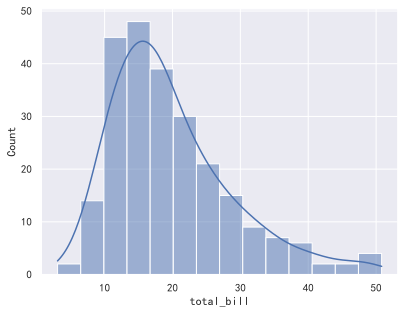

In [79]:
#如果我们希望了解账单金额的分布，可以使用下面的代码来绘制分布图。
sns.histplot(data=tips_df,x='total_bill',kde=True)

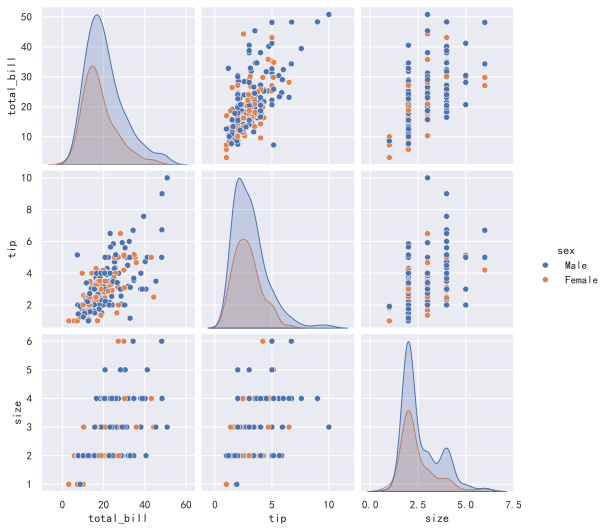

In [89]:
#如果想了解变量之间的两两关系，我们可以绘制点对图，代码和效果如下所示。
sns.pairplot(data=tips_df,hue='sex')

In [93]:
#如果对上面图表的颜色不满意，还可以通过 palette 参数选择 seaborn 自带的“调色板”来修改颜色，这种方式相比于自行指定颜色或使用随机颜色方便和靠谱了很多，下图为大家展示了部分 seaborn 自带的“调色板”。
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [94]:
sns.color_palette('husl')

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

In [95]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [96]:
sns.color_palette('Dark2')

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

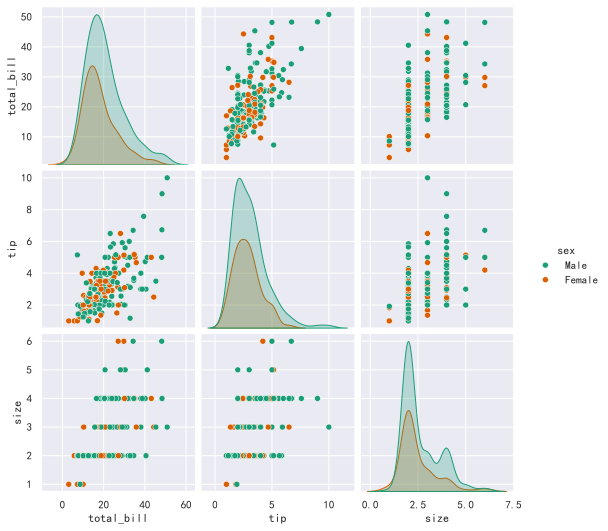

In [97]:
sns.pairplot(data=tips_df, hue='sex', palette='Dark2')

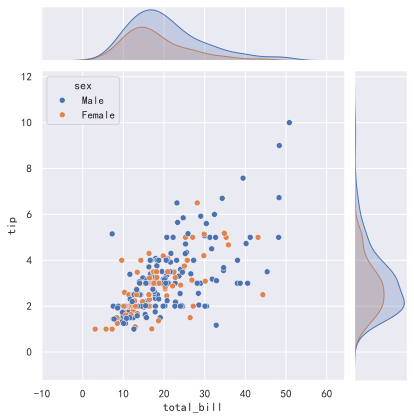

In [103]:
#接下来，我们为 total_bill 和 tip 两组数据绘制联合分布图，代码如下所示
sns.jointplot(data=tips_df, x='total_bill', y='tip', hue='sex')
#上面清晰的展示了，total_bill 和 tip 之间存在正相关关系，这一点我们也可以通过 DataFrame 对象的 corr 方法进行验证。接下来，我们可以建立回归模型来拟合这些数据点，而 seaborn 的线性回归模型图已经帮我们实现了这项功能，代码如下所示。

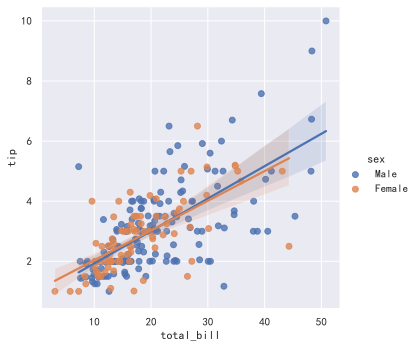

In [112]:
#seaborn 的线性回归模型图
sns.lmplot(data = tips_df, x='total_bill', y='tip' , hue= 'sex')

C:\Users\10032\AppData\Local\Temp\ipykernel_16184\2868855550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(tips_df, x='day', y='total_bill',palette='Dark2')


<Axes: xlabel='day', ylabel='total_bill'>

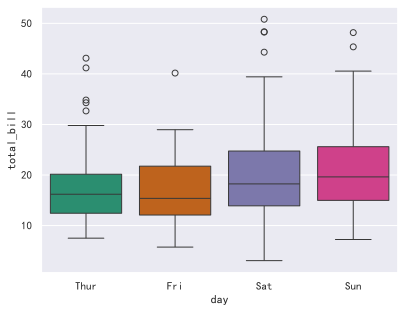

In [124]:
#如果我们希望了解账单金额的集中和离散趋势，可以绘制箱线图或小提琴图，代码如下所示，我们将数据按星期四、星期五、星期六和星期天分别进行展示。
%config InlineBackend.figure_format='svg'
sns.boxplot(tips_df, x='day', y='total_bill',palette='Dark2')

C:\Users\10032\AppData\Local\Temp\ipykernel_16184\786926517.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(tips_df, x='day', y='total_bill',palette='Dark2')


<Axes: xlabel='day', ylabel='total_bill'>

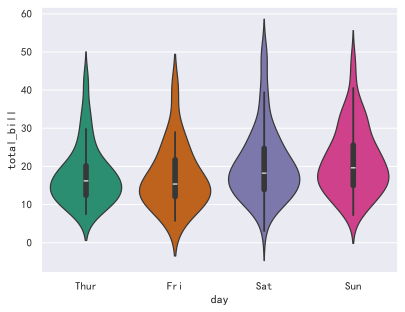

In [123]:
sns.violinplot(tips_df, x='day', y='total_bill',palette='Dark2')
#说明：相较于箱线图，小提琴图没有标注异常点而是显示了数据的整个范围，另一方面，小提琴图很好的展示了数据的分布（密度轨迹）。

In [130]:
#Pyecharts
#Echarts 原来是百度开发的一个前端图表库，2018年1月16日，ECharts 进入 Apache Incubator 进行孵化，目前已经是 Apache 软件基金会的顶级项目。凭借着良好的交互性和精巧的图表设计，ECharts 得到了众多开发者的认可，而 pyecharts 就是基于 Python 语言对 ECharts 进行了包装，让 Python 开发者也可以使用 ECharts 绘制外观精美且交互性强的统计图表。

from pyecharts.charts import Bar
from pyecharts import options
from pyecharts.globals import ThemeType

#创建柱状图对象并设置初始参数（宽度，高度，主题）
bar = Bar(
    init_opts=options.InitOpts(
        width = '600px',
        height = '450px',
        theme = ThemeType.CHALK
    )
)
#设置横轴数据
bar.add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
#设置纵轴数据（第一组）
bar.add_yaxis(
    '商家A',
    [25,20,36,10,75,90]
)
# 设置纵轴数据（第二组）
bar.add_yaxis(
    "商家B",
    [15, 12, 30, 20, 45, 60]
)
# 设置纵轴数据（第三组）
bar.add_yaxis(
    "商家C",
    [12, 32, 40, 52, 35, 26]
)
bar.set_global_opts(
    xaxis_opts=options.AxisOpts(
        axislabel_opts=options.LabelOpts(
            color='white',
        )
    ),
    # 纵轴相关的参数（标签、最小值、最大值、间隔）
    yaxis_opts=options.AxisOpts(
        axislabel_opts=options.LabelOpts(
            color='white'
        ),
        min_=0,
        max_=100,
        interval=10
    ),
    # 标题相关的参数（内容、链接、位置、文本样式）
    title_opts=options.TitleOpts(
        title='2021年销售数据展示',
        title_link='http://xyq.163.com',
        pos_left='2%',
        title_textstyle_opts=options.TextStyleOpts(
            color='white',
            font_size=16,
            font_family='SimHei',
            font_weight='bold'
        )
    ),
    # 工具箱相关的参数
    toolbox_opts=options.ToolboxOpts(
        orient='vertical',
        pos_left='right'
    )
)
# 在Jupyter Notebook中渲染图表
bar.render_notebook()

In [137]:
import pyecharts.options as opts
from pyecharts.charts import Pie

# 准备饼图需要的数据
x_data = ["直接访问", "邮件营销", "联盟广告", "视频广告", "搜索引擎"]
y_data = [335, 310, 234, 135, 1548]
data = [(x, y) for x, y in zip(x_data, y_data)]

# 创建饼图对象并设置初始化参数
pie = Pie(init_opts=opts.InitOpts(width="800px", height="400px"))
# 向饼图添加数据
pie.add(
    '',
    data_pair=data,
    radius=["50%", "75%"],
    label_opts=opts.LabelOpts(is_show=False),
)
# 设置全局配置项
pie.set_global_opts(
    # 配置图例相关的参数
    legend_opts=opts.LegendOpts(
        pos_left="legft",
        orient="vertical",
        textstyle_opts=opts.TextStyleOpts(
            color='white',
        )
    )
)
# 设置数据系列配置参数
pie.set_series_opts(
    # 设置不显示工具提示
    tooltip_opts=opts.TooltipOpts(is_show=False),
    # 设置饼图标签的样式
    label_opts=opts.LabelOpts(formatter="{b}({c}): {d}%")
)
pie.render_notebook()

In [139]:
data = [
    ('广东', 594), ('浙江', 438), ('四川', 316), ('北京', 269), ('山东', 248),
    ('江苏', 234), ('湖南', 196), ('福建', 166), ('河南', 153), ('辽宁', 152),
    ('上海', 138), ('河北', 86), ('安徽', 79), ('湖北', 75), ('黑龙江', 70),
    ('陕西', 63), ('吉林', 59), ('江西', 56), ('重庆', 46), ('贵州', 39),
    ('山西', 37), ('云南', 33), ('广西', 24), ('天津', 22), ('新疆', 21),
    ('海南', 18), ('内蒙古', 14), ('台湾', 11), ('甘肃', 7), ('广西壮族自治区', 4),
    ('香港', 4), ('青海', 3), ('新疆维吾尔自治区', 3), ('内蒙古自治区', 3), ('宁夏', 1)
]
from pyecharts.charts import Map

map_chart = Map()
map_chart.add('', data, 'china', is_roam=False)
map_chart.render_notebook()